# 시각화

In [111]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
import seaborn as sns

In [112]:
# 그래프 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import json

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# if platform.system() == 'Darwin':  # 맥OS 
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':  # 윈도우
#     path = "c:/Windows/Fonts/malgun.ttf"
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# else:
#     print('Unknown system...  sorry~~~')

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [113]:
# 한글폰트사용
from matplotlib import font_manager,rc
font_path = "C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Font/a타이틀고딕2.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [114]:
plt.style.use("default")
plt.rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

# 학교폭력피해장소

In [115]:
# 1. 학교폭력피해장소 데이터 불러오기(구별 고등학교 수)
place = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_서울_학교폭력피해장소.csv")
place

,시군구,학교명,구분,교실안,"특별실,방과후 교실 등","복도,계단",화장실,"운동장,체육관,강당 등","급식실,매점 등",기숙사,학원이나학원 근처,집이나집 근처,"PC방,노래방,오락실 등","공원, 놀이터,골목, 공터,뒷산 등",학교 밖체험활동 장소,사이버공간,기타
0,강남구,개포고등학교,2021학년도,1,0,1,0,1,0,0,0,0,0,0,0,2,0
1,강남구,경기고등학교,2021학년도,2,0,1,0,0,0,0,0,1,0,0,0,0,0
2,강남구,경기여자고등학교,2021학년도,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,강남구,국립국악고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,강남구,단국대학교부속소프트웨어고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,중랑구,원묵고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,0,0
316,중랑구,이화여자대학교병설미디어고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,0,0
317,중랑구,중화고등학교,2021학년도,1,1,1,0,0,0,0,0,0,1,1,0,0,0
318,중랑구,태릉고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [116]:
# 피해장소 시각화 전 데이터 조정 
place.loc[320] = place.sum()
place

,시군구,학교명,구분,교실안,"특별실,방과후 교실 등","복도,계단",화장실,"운동장,체육관,강당 등","급식실,매점 등",기숙사,학원이나학원 근처,집이나집 근처,"PC방,노래방,오락실 등","공원, 놀이터,골목, 공터,뒷산 등",학교 밖체험활동 장소,사이버공간,기타
0,강남구,개포고등학교,2021학년도,1,0,1,0,1,0,0,0,0,0,0,0,2,0
1,강남구,경기고등학교,2021학년도,2,0,1,0,0,0,0,0,1,0,0,0,0,0
2,강남구,경기여자고등학교,2021학년도,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,강남구,국립국악고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,강남구,단국대학교부속소프트웨어고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,중랑구,이화여자대학교병설미디어고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,0,0
317,중랑구,중화고등학교,2021학년도,1,1,1,0,0,0,0,0,0,1,1,0,0,0
318,중랑구,태릉고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,1,0
319,중랑구,혜원여자고등학교,2021학년도,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
place_sum = place.loc[[320]]
place_sum.drop(['시군구','학교명','구분'],axis=1, inplace=True)
place_sum

,교실안,"특별실,방과후 교실 등","복도,계단",화장실,"운동장,체육관,강당 등","급식실,매점 등",기숙사,학원이나학원 근처,집이나집 근처,"PC방,노래방,오락실 등","공원, 놀이터,골목, 공터,뒷산 등",학교 밖체험활동 장소,사이버공간,기타
320,164,22,106,25,33,27,5,17,26,11,27,19,96,35


In [118]:
place_sum['피해장소합계'] = place_sum.sum(axis='columns')
place_sum

,교실안,"특별실,방과후 교실 등","복도,계단",화장실,"운동장,체육관,강당 등","급식실,매점 등",기숙사,학원이나학원 근처,집이나집 근처,"PC방,노래방,오락실 등","공원, 놀이터,골목, 공터,뒷산 등",학교 밖체험활동 장소,사이버공간,기타,피해장소합계
320,164,22,106,25,33,27,5,17,26,11,27,19,96,35,613


In [119]:
pd.options.display.float_format = '{: .2f}'.format
place_sum_rate = place_sum.apply(lambda x : x/place_sum['피해장소합계']*100)
place_sum_rate.drop(['피해장소합계'],axis=1, inplace=True)
place_sum_rate

,교실안,"특별실,방과후 교실 등","복도,계단",화장실,"운동장,체육관,강당 등","급식실,매점 등",기숙사,학원이나학원 근처,집이나집 근처,"PC방,노래방,오락실 등","공원, 놀이터,골목, 공터,뒷산 등",학교 밖체험활동 장소,사이버공간,기타
320,26.75,3.59,17.29,4.08,5.38,4.40,0.82,2.77,4.24,1.79,4.40,3.10,15.66,5.71


In [120]:
place_sum_rate_ver2 = place_sum_rate.transpose()

In [121]:
place_sum_rate_ver2.reset_index(inplace=True)

In [122]:
place_sum_rate_ver2

,index,320
0,교실안,26.75
1,"특별실,방과후 교실 등",3.59
2,"복도,계단",17.29
3,화장실,4.08
4,"운동장,체육관,강당 등",5.38
5,"급식실,매점 등",4.40
6,기숙사,0.82
7,학원이나학원 근처,2.77
8,집이나집 근처,4.24
9,"PC방,노래방,오락실 등",1.79


In [123]:
place_sum_rate_ver2.rename(columns={'index':'학교폭력_피해장소', 320:'비율'},inplace=True)
place_sum_rate_ver2.sort_values('비율',ascending=False,inplace=True)

In [124]:
order_lst = place_sum_rate_ver2['학교폭력_피해장소'].tolist()
order_lst

['교실안',
 '복도,계단',
 '사이버공간',
 '기타',
 '운동장,체육관,강당 등',
 '급식실,매점 등',
 '공원, 놀이터,골목, 공터,뒷산 등',
 '집이나집 근처',
 '화장실',
 '특별실,방과후 교실 등',
 '학교 밖체험활동 장소',
 '학원이나학원 근처',
 'PC방,노래방,오락실 등',
 '기숙사']

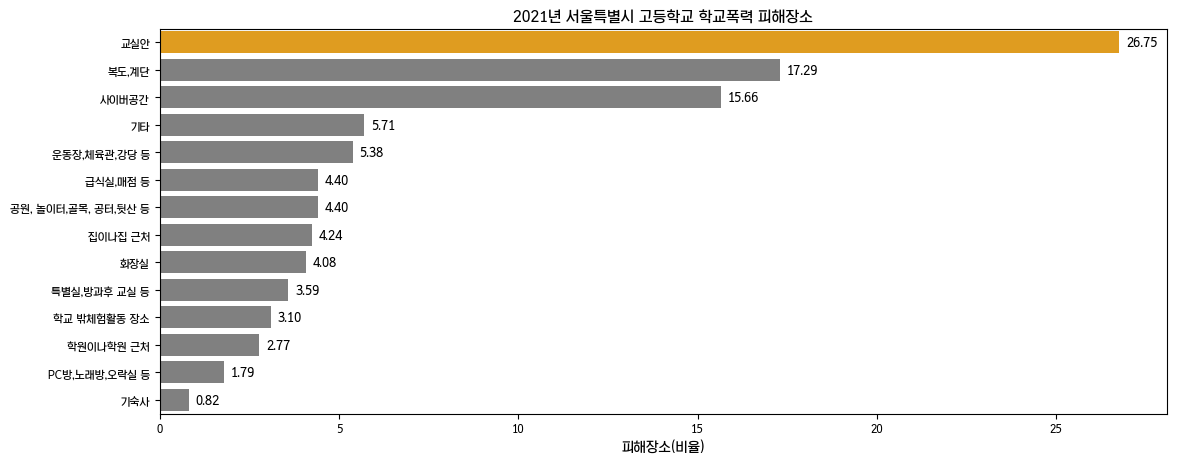

In [125]:
# 시각화
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)


cols = ['grey' if (x < max(place_sum_rate_ver2.비율)) else 'orange' for x in place_sum_rate_ver2.비율]
# palette='Set3'
# palette=cols

splot = sns.barplot(data = place_sum_rate_ver2, y='학교폭력_피해장소', x ='비율', order = order_lst, palette=cols)
ax.set_title('2021년 서울특별시 고등학교 학교폭력 피해장소', size = 11)
ax.set_xlabel('피해장소(비율)')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 9)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.savefig("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_고등학교_학교폭력_피해장소_시각화.png")
plt.show()

# 학교폭력피해유형

In [126]:
# 2. 학교폭력피해유형 데이터 불러오기(구별 고등학교 수)
typedf = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_서울_학교폭력피해유형.csv")
typedf

,시군구,학교명,구분,강요,금품갈취,신체폭력,사이버폭력,집단따돌림,기타
0,강남구,개포고등학교,2021학년도,0,0,0,2,1,0
1,강남구,경기고등학교,2021학년도,0,2,2,0,1,1
2,강남구,경기여자고등학교,2021학년도,0,0,0,0,0,1
3,강남구,국립국악고등학교,2021학년도,0,0,0,0,0,0
4,강남구,단국대학교부속소프트웨어고등학교,2021학년도,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
315,중랑구,원묵고등학교,2021학년도,0,0,0,0,0,0
316,중랑구,이화여자대학교병설미디어고등학교,2021학년도,0,0,0,0,0,0
317,중랑구,중화고등학교,2021학년도,0,1,1,0,0,1
318,중랑구,태릉고등학교,2021학년도,1,0,1,1,1,2


In [127]:
# 피해유형 시각화 전 데이터 조정 
typedf.loc[320] = typedf.sum()
typedf

typedf_sum = typedf.loc[[320]]
typedf_sum.drop(['시군구','학교명','구분'],axis=1, inplace=True)
typedf_sum

typedf_sum['피해유형합계'] = typedf_sum.sum(axis='columns')
typedf_sum

pd.options.display.float_format = '{: .2f}'.format
typedf_sum_rate = typedf_sum.apply(lambda x : x/typedf_sum['피해유형합계']*100)
typedf_sum_rate.drop(['피해유형합계'],axis=1, inplace=True)
typedf_sum_rate

typedf_sum_rate_ver2 = typedf_sum_rate.transpose()

typedf_sum_rate_ver2.reset_index(inplace=True)
typedf_sum_rate_ver2.sort_values(320,ascending=False,inplace=True)
typedf_sum_rate_ver2

,index,320
4,집단따돌림,30.00
3,사이버폭력,26.67
2,신체폭력,15.56
5,기타,13.33
0,강요,8.89
1,금품갈취,5.56


In [128]:
typedf_sum_rate_ver2.rename(columns={'index':'학교폭력_피해유형', 320:'비율'},inplace=True)
typedf_sum_rate_ver2.sort_values('비율',ascending=False,inplace=True)
typedf_sum_rate_ver2

,학교폭력_피해유형,비율
4,집단따돌림,30.00
3,사이버폭력,26.67
2,신체폭력,15.56
5,기타,13.33
0,강요,8.89
1,금품갈취,5.56


In [129]:
order_lst = typedf_sum_rate_ver2['학교폭력_피해유형'].tolist()
order_lst

['집단따돌림', '사이버폭력', '신체폭력', '기타', '강요', '금품갈취']

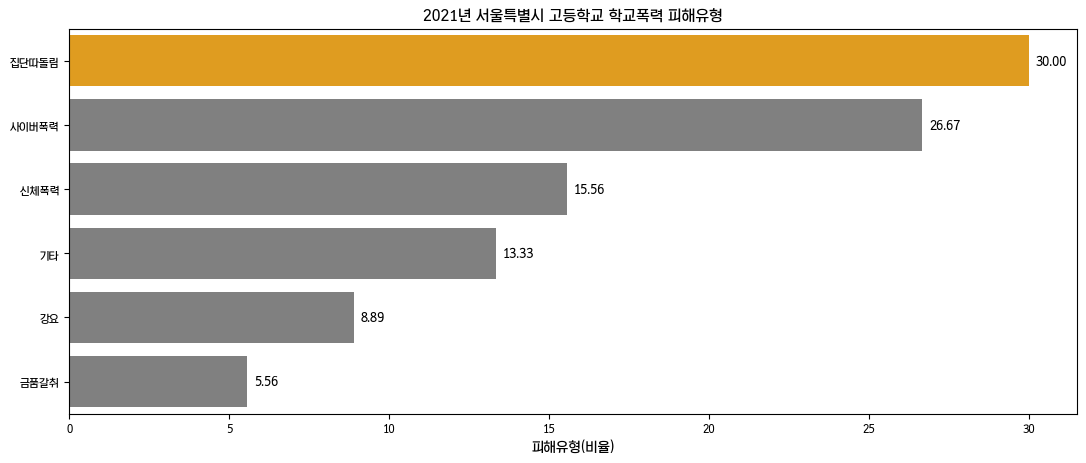

In [130]:
# 시각화
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)


cols = ['grey' if (x < max(typedf_sum_rate_ver2.비율)) else 'orange' for x in typedf_sum_rate_ver2.비율]
# palette='Set3'
# palette=cols

splot = sns.barplot(data = typedf_sum_rate_ver2, y='학교폭력_피해유형', x ='비율', order = order_lst, palette=cols)
ax.set_title('2021년 서울특별시 고등학교 학교폭력 피해유형', size = 11)
ax.set_xlabel('피해유형(비율)')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 9)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.savefig("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_고등학교_학교폭력_피해유형_시각화.png")
plt.show()

# 학교폭력피해시간

In [131]:
# 3. 학교폭력피해시간 데이터 불러오기(구별 고등학교 수)
time = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_서울_학교폭력피해시간.csv")
time

,시군구,학교명,구분,등교시간,수업시간,쉬는시간,점심시간,학교 안방과후 시간,하교시간,학교 밖체험활동 시간,학교 일과가끝난 후,기타
0,강남구,개포고등학교,2021학년도,0,0,1,0,0,1,0,2,0
1,강남구,경기고등학교,2021학년도,1,1,2,2,1,1,1,0,0
2,강남구,경기여자고등학교,2021학년도,0,1,1,1,0,0,0,0,0
3,강남구,국립국악고등학교,2021학년도,0,0,0,0,0,0,0,0,0
4,강남구,단국대학교부속소프트웨어고등학교,2021학년도,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
315,중랑구,원묵고등학교,2021학년도,0,0,0,0,0,0,0,0,0
316,중랑구,이화여자대학교병설미디어고등학교,2021학년도,0,0,0,0,0,0,0,0,0
317,중랑구,중화고등학교,2021학년도,0,1,1,1,0,0,0,1,0
318,중랑구,태릉고등학교,2021학년도,0,0,0,0,0,0,0,0,1


In [132]:
# 피해시간 시각화 전 데이터 조정 
time.loc[320] = time.sum()
time

time_sum = time.loc[[320]]
time_sum.drop(['시군구','학교명','구분'],axis=1, inplace=True)
time_sum

time_sum['피해시간합계'] = time_sum.sum(axis='columns')
time_sum

pd.options.display.float_format = '{: .2f}'.format
time_sum_rate = time_sum.apply(lambda x : x/time_sum['피해시간합계']*100)
time_sum_rate.drop(['피해시간합계'],axis=1, inplace=True)
time_sum_rate

time_sum_rate_ver2 = time_sum_rate.transpose()

time_sum_rate_ver2.reset_index(inplace=True)
time_sum_rate_ver2.sort_values(320,ascending=False,inplace=True)
time_sum_rate_ver2

,index,320
2,쉬는시간,26.01
3,점심시간,17.76
7,학교 일과가끝난 후,15.89
1,수업시간,12.77
5,하교시간,7.63
0,등교시간,7.32
8,기타,7.01
6,학교 밖체험활동 시간,3.12
4,학교 안방과후 시간,2.49


In [133]:
time_sum_rate_ver2.rename(columns={'index':'학교폭력_피해시간', 320:'비율'},inplace=True)
time_sum_rate_ver2.sort_values('비율',ascending=False,inplace=True)
time_sum_rate_ver2

,학교폭력_피해시간,비율
2,쉬는시간,26.01
3,점심시간,17.76
7,학교 일과가끝난 후,15.89
1,수업시간,12.77
5,하교시간,7.63
0,등교시간,7.32
8,기타,7.01
6,학교 밖체험활동 시간,3.12
4,학교 안방과후 시간,2.49


In [134]:
order_lst = time_sum_rate_ver2['학교폭력_피해시간'].tolist()
order_lst

['쉬는시간',
 '점심시간',
 '학교 일과가끝난 후',
 '수업시간',
 '하교시간',
 '등교시간',
 '기타',
 '학교 밖체험활동 시간',
 '학교 안방과후 시간']

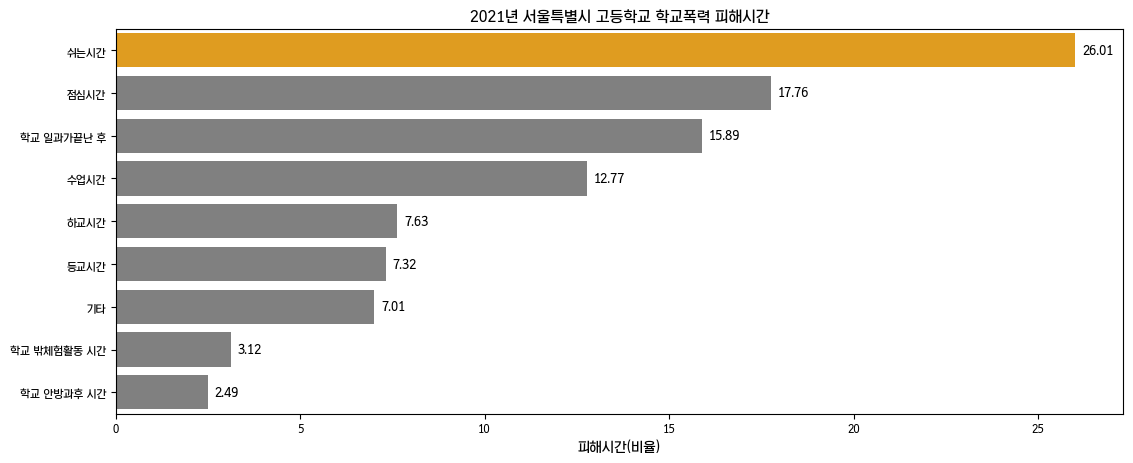

In [135]:
# 시각화
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)


cols = ['grey' if (x < max(time_sum_rate_ver2.비율)) else 'orange' for x in time_sum_rate_ver2.비율]
# palette='Set3'
# palette=cols

splot = sns.barplot(data = time_sum_rate_ver2, y='학교폭력_피해시간', x ='비율', order = order_lst, palette=cols)
ax.set_title('2021년 서울특별시 고등학교 학교폭력 피해시간', size = 11)
ax.set_xlabel('피해시간(비율)')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 9)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.savefig("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_고등학교_학교폭력_피해시간_시각화.png")
plt.show()

# 학교폭력피해신고현황

In [136]:
# 4. 학교폭력피해신고현황 데이터 불러오기
noti = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_서울_학교폭력피해신고현황.csv")
noti

,시군구,학교명,구분,나의보호자나친척,학교선생님,학교상담실선생님,학교폭력신고함이나학교 익명게시판,친구나선·후배,"학교전담경찰관,경찰",117학교폭력신고센터,학교 밖상담 기관,아무에게도알리지않음
0,강남구,개포고등학교,2021학년도,20.00,20.00,0.00,0.00,40.00,20.00,0.00,0.00,0.00
1,강남구,경기고등학교,2021학년도,25.00,25.00,12.50,0.00,12.50,12.50,0.00,0.00,12.50
2,강남구,경기여자고등학교,2021학년도,33.30,33.30,0.00,0.00,33.30,0.00,0.00,0.00,0.00
3,강남구,국립국악고등학교,2021학년도,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,강남구,단국대학교부속소프트웨어고등학교,2021학년도,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
315,중랑구,원묵고등학교,2021학년도,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
316,중랑구,이화여자대학교병설미디어고등학교,2021학년도,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
317,중랑구,중화고등학교,2021학년도,50.00,0.00,0.00,0.00,50.00,0.00,0.00,0.00,0.00
318,중랑구,태릉고등학교,2021학년도,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00


In [137]:
# 피해신고현황 시각화 전 데이터 조정 
noti.loc[320] = noti.sum()
noti

noti_sum = noti.loc[[320]]
noti_sum.drop(['시군구','학교명','구분'],axis=1, inplace=True)
noti_sum

noti_sum['피해신고현황합계'] = noti_sum.sum(axis='columns')
noti_sum

pd.options.display.float_format = '{: .2f}'.format
noti_sum_rate = noti_sum.apply(lambda x : x/noti_sum['피해신고현황합계']*100)
noti_sum_rate.drop(['피해신고현황합계'],axis=1, inplace=True)
noti_sum_rate

noti_sum_rate_ver2 = noti_sum_rate.transpose()

noti_sum_rate_ver2.reset_index(inplace=True)
noti_sum_rate_ver2.sort_values(320,ascending=False,inplace=True)
noti_sum_rate_ver2

,index,320
0,나의보호자나친척,31.39
1,학교선생님,27.91
4,친구나선·후배,17.54
8,아무에게도알리지않음,8.28
2,학교상담실선생님,7.06
5,"학교전담경찰관,경찰",3.93
6,117학교폭력신고센터,1.89
7,학교 밖상담 기관,1.52
3,학교폭력신고함이나학교 익명게시판,0.49


In [138]:
noti_sum_rate_ver2.rename(columns={'index':'학교폭력_피해신고현황', 320:'비율'},inplace=True)
noti_sum_rate_ver2.sort_values('비율',ascending=False,inplace=True)
noti_sum_rate_ver2

,학교폭력_피해신고현황,비율
0,나의보호자나친척,31.39
1,학교선생님,27.91
4,친구나선·후배,17.54
8,아무에게도알리지않음,8.28
2,학교상담실선생님,7.06
5,"학교전담경찰관,경찰",3.93
6,117학교폭력신고센터,1.89
7,학교 밖상담 기관,1.52
3,학교폭력신고함이나학교 익명게시판,0.49


In [139]:
order_lst = noti_sum_rate_ver2['학교폭력_피해신고현황'].tolist()
order_lst

['나의보호자나친척',
 '학교선생님',
 '친구나선·후배',
 '아무에게도알리지않음',
 '학교상담실선생님',
 '학교전담경찰관,경찰',
 '117학교폭력신고센터',
 '학교 밖상담 기관',
 '학교폭력신고함이나학교 익명게시판']

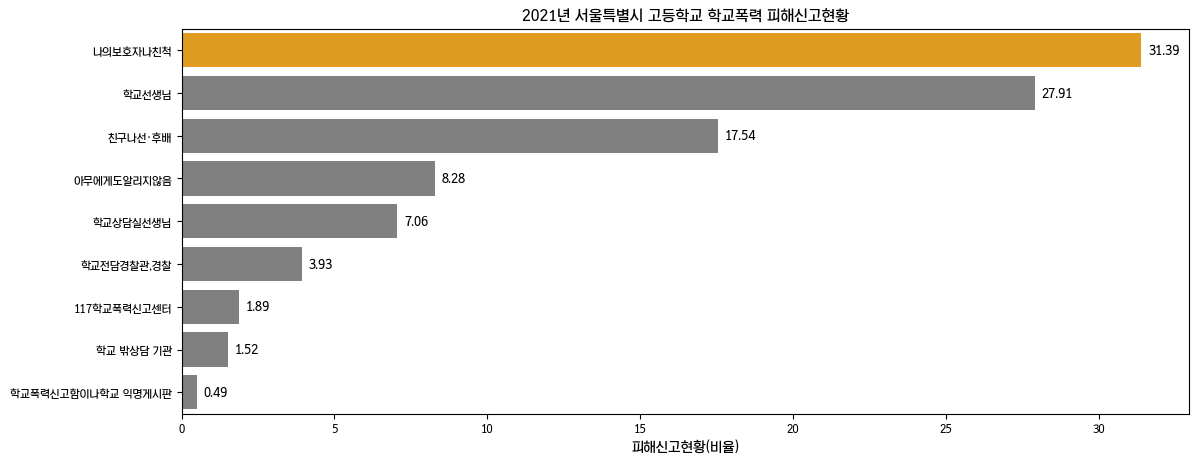

In [140]:
# 시각화
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)


cols = ['grey' if (x < max(noti_sum_rate_ver2.비율)) else 'orange' for x in noti_sum_rate_ver2.비율]
# palette='Set3'
# palette=cols

splot = sns.barplot(data = noti_sum_rate_ver2, y='학교폭력_피해신고현황', x ='비율', order = order_lst, palette=cols)
ax.set_title('2021년 서울특별시 고등학교 학교폭력 피해신고현황', size = 11)
ax.set_xlabel('피해신고현황(비율)')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 9)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.savefig("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_고등학교_학교폭력_피해신고현황_시각화.png")
plt.show()

In [141]:
# 5. 학교폭력교육시간 데이터 불러오기
edu = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_서울_학교폭력교육시간.csv")
edu

,시군구,학교명,평균 교육 시간(1학급당)
0,강남구,개포고등학교,126.40
1,강남구,경기고등학교,38.10
2,강남구,경기여자고등학교,200.00
3,강남구,국립국악고등학교,113.00
4,강남구,단국대학교부속소프트웨어고등학교,262.50
...,...,...,...
315,중랑구,원묵고등학교,13.25
316,중랑구,이화여자대학교병설미디어고등학교,100.00
317,중랑구,중화고등학교,626.40
318,중랑구,태릉고등학교,44.40


In [142]:
edu.mean()

C:\Users\ppi06\AppData\Local\Temp\ipykernel_18204\380323757.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  edu.mean()


평균 교육 시간(1학급당)    159.78
dtype: float64

In [144]:
school_original_data = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\학교알리미_2021_서울_학교폭력실태조사_참여현황.csv")
school_original_data

,시군구,학교명,구분,대상 학생 수,학생 수,참여율(고등학교별 전국참여율),피해 응답 학생 수
0,강남구,개포고등학교,2021학년도,640,584,91.3( 85.2),2
1,강남구,경기고등학교,2021학년도,"1,100",689,62.6( 85.2),3
2,강남구,경기여자고등학교,2021학년도,"1,095",962,87.9( 85.2),1
3,강남구,국립국악고등학교,2021학년도,438,372,84.9( 85.2),0
4,강남구,단국대학교부속소프트웨어고등학교,2021학년도,267,261,97.8( 85.2),0
...,...,...,...,...,...,...,...
315,중랑구,원묵고등학교,2021학년도,643,591,91.9( 85.2),0
316,중랑구,이화여자대학교병설미디어고등학교,2021학년도,537,431,80.3( 85.2),0
317,중랑구,중화고등학교,2021학년도,542,345,63.7( 85.2),2
318,중랑구,태릉고등학교,2021학년도,708,577,81.5( 85.2),1


In [145]:
# , 제거 후 int형으로 변경
school_original_data['대상 학생 수'] = school_original_data['대상 학생 수'].apply(lambda x: x.replace(',',''))
school_original_data['대상 학생 수'] = school_original_data['대상 학생 수'].astype('int')

In [146]:
# 피해응답수 / 대상학생수 
school_original_data['피해응답학생수_비율'] = school_original_data['피해 응답 학생 수']/school_original_data['대상 학생 수']*100
school_original_data

,시군구,학교명,구분,대상 학생 수,학생 수,참여율(고등학교별 전국참여율),피해 응답 학생 수,피해응답학생수_비율
0,강남구,개포고등학교,2021학년도,640,584,91.3( 85.2),2,0.31
1,강남구,경기고등학교,2021학년도,1100,689,62.6( 85.2),3,0.27
2,강남구,경기여자고등학교,2021학년도,1095,962,87.9( 85.2),1,0.09
3,강남구,국립국악고등학교,2021학년도,438,372,84.9( 85.2),0,0.00
4,강남구,단국대학교부속소프트웨어고등학교,2021학년도,267,261,97.8( 85.2),0,0.00
...,...,...,...,...,...,...,...,...
315,중랑구,원묵고등학교,2021학년도,643,591,91.9( 85.2),0,0.00
316,중랑구,이화여자대학교병설미디어고등학교,2021학년도,537,431,80.3( 85.2),0,0.00
317,중랑구,중화고등학교,2021학년도,542,345,63.7( 85.2),2,0.37
318,중랑구,태릉고등학교,2021학년도,708,577,81.5( 85.2),1,0.14


In [147]:
school_original_data = school_original_data[['학교명','피해응답학생수_비율']]

In [148]:
school_original_data.mean()

C:\Users\ppi06\AppData\Local\Temp\ipykernel_18204\3678327428.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  school_original_data.mean()


피해응답학생수_비율    0.18
dtype: float64

In [149]:
data = pd.merge(edu, school_original_data, on=['학교명'], how='outer', sort=True)
data.sort_values('시군구',ascending=True,inplace=True)
data['평균 교육 시간(1학급당)'].max()

800.0

# 평균교육시간과 학교알리미 피해응답수 상관관계 : -0.340000
### 평균교육시간이 많을수록 피해응답수는 적고, 평균교육시간이 적을수록 피해응답수는 많음

## 평균교육시간이 평균에 미치지 못하고, 피해응답학생수는 평균보다 많은 고등학교

In [150]:
# 평균교육시간(1학급당) = 159.78(평균)
# 피해응답학생수_비율 = 0.18(평균)
# ascending=False : 내림차순
# ascending=True : 오름차순

data_s = data[(data['평균 교육 시간(1학급당)'] < 159.78)&(data['피해응답학생수_비율'] > 0.18)]
data_s = data_s.sort_values(by=["평균 교육 시간(1학급당)", "피해응답학생수_비율"], ascending=[False, True]) 
data_s

,시군구,학교명,평균 교육 시간(1학급당),피해응답학생수_비율
45,금천구,금천고등학교,159.50,0.43
172,광진구,선화예술고등학교,150.00,0.18
308,강북구,혜화여자고등학교,150.00,0.31
121,종로구,상명대학교사범대학부속여자고등학교,150.00,0.44
293,노원구,한국삼육고등학교,150.00,0.66
...,...,...,...,...
148,강서구,서울신정고등학교,7.75,0.78
137,성북구,서울도시과학기술고등학교,7.15,0.76
319,동대문구,휘봉고등학교,6.30,0.45
48,노원구,노원고등학교,2.90,0.36


In [151]:
grouped = data_s.groupby('시군구')
type(grouped)
grouped.size()

시군구
강남구     6
강동구     3
강북구     2
강서구     8
관악구     3
광진구     4
구로구     4
금천구     4
노원구     6
도봉구     1
동대문구    1
마포구     2
서대문구    2
서초구     3
성동구     3
성북구     3
송파구     3
양천구     4
영등포구    2
용산구     2
은평구     4
종로구     5
중구      2
중랑구     2
dtype: int64

In [152]:
# 그룹 순회 데이터프레임 분할
for key, group in grouped :
    print("* key", key)
    print(group)
    print('\n')

* key 강남구
     시군구        학교명  평균 교육 시간(1학급당)  피해응답학생수_비율
288  강남구     풍문고등학교          138.90        0.25
6    강남구     개포고등학교          126.40        0.31
282  강남구     청담고등학교          115.85        0.20
66   강남구  대진디자인고등학교          106.70        0.66
8    강남구     경기고등학교           38.10        0.27
210  강남구    압구정고등학교           20.70        0.35


* key 강동구
     시군구       학교명  평균 교육 시간(1학급당)  피해응답학생수_비율
174  강동구    성덕고등학교          111.65        0.60
82   강동구    동북고등학교          104.80        0.19
95   강동구  명일여자고등학교          100.00        0.19


* key 강북구
     시군구       학교명  평균 교육 시간(1학급당)  피해응답학생수_비율
308  강북구  혜화여자고등학교          150.00        0.31
231  강북구    영훈고등학교          125.00        0.20


* key 강서구
     시군구           학교명  평균 교육 시간(1학급당)  피해응답학생수_비율
71   강서구      덕원예술고등학교          137.30        0.35
88   강서구        등촌고등학교           45.20        0.19
229  강서구        영일고등학교           41.65        0.24
313  강서구    화곡보건경영고등학교           39.00        1.09
196  강서구        수명고등학교           3

In [153]:
gu1 = grouped.get_group('강남구')
gu1

,시군구,학교명,평균 교육 시간(1학급당),피해응답학생수_비율
288,강남구,풍문고등학교,138.90,0.25
6,강남구,개포고등학교,126.40,0.31
282,강남구,청담고등학교,115.85,0.20
66,강남구,대진디자인고등학교,106.70,0.66
8,강남구,경기고등학교,38.10,0.27
210,강남구,압구정고등학교,20.70,0.35


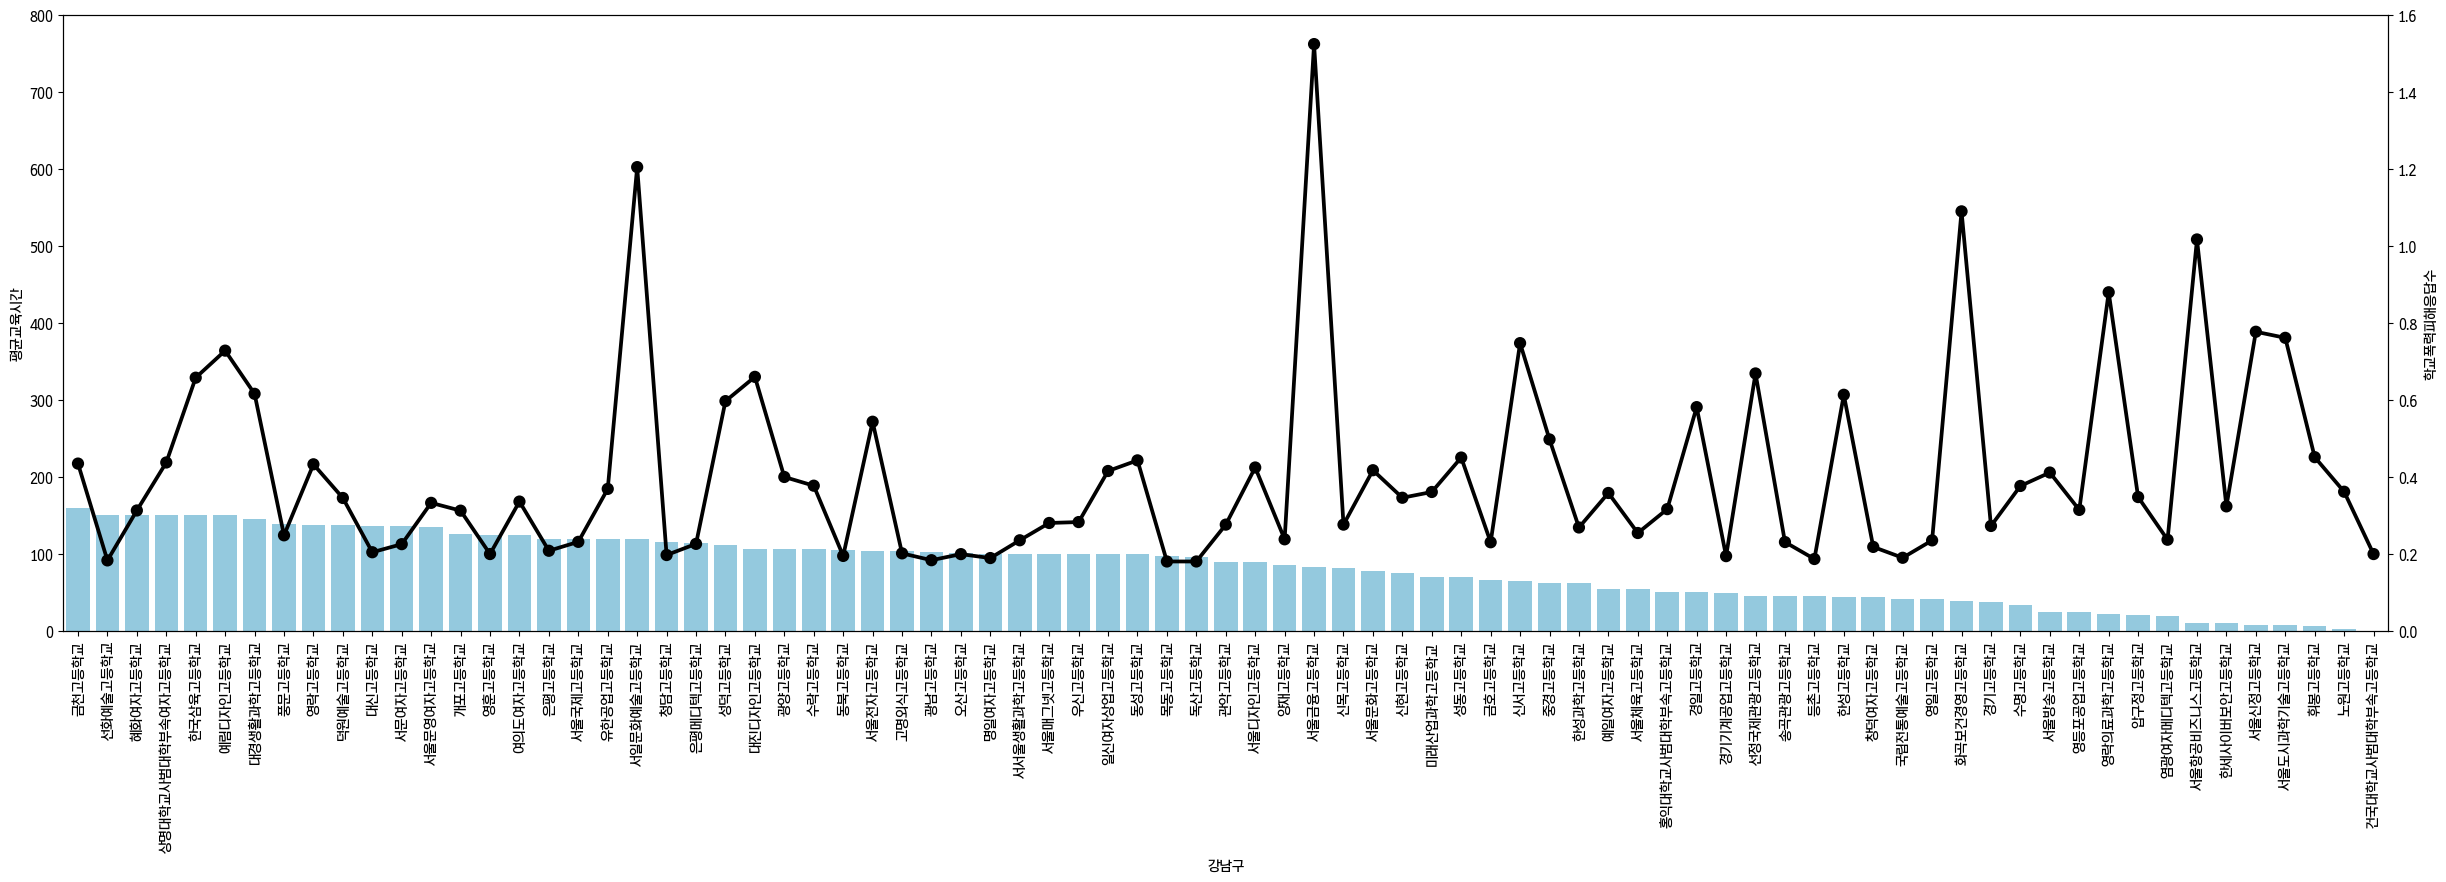

In [110]:
fig, axe1 = plt.subplots()
fig.set_size_inches(30, 8)

axe2 = axe1.twinx()

c1 = sns.barplot(ax = axe1, data = data_s, x ='학교명', y = '평균 교육 시간(1학급당)', color = 'skyblue')
c2 = sns.pointplot(ax = axe2, data = data_s, x ='학교명', y = '피해응답학생수_비율', color = 'k')

# axe1.legend(['평균교육시간', '학교폭력피해응답수'])

axe1.set_xticklabels(axe1.get_xticklabels(),rotation = 90)
axe1.set_xlabel('강남구')
axe1.set_ylabel('평균교육시간')
axe2.set_ylabel('학교폭력피해응답수')
axe1.set_ylim(0,800)
axe2.set_ylim(0,1.6)
plt.show()

## 평균교육시간이 평균에 미치고, 피해응답학생수는 평균보다 적은 고등학교 

In [ ]:
# 평균교육시간(1학급당) = 159.78(평균)
# 피해응답학생수_비율 = 0.18(평균)

In [160]:
data[(data['평균 교육 시간(1학급당)'] >= 159.78)&(data['피해응답학생수_비율'] <= 0.18)]

,시군구,학교명,평균 교육 시간(1학급당),피해응답학생수_비율
271,강남구,중산고등학교,500.00,0.00
51,강남구,단국대학교사범대학부속고등학교,255.00,0.00
50,강남구,단국대학교부속소프트웨어고등학교,262.50,0.00
194,강남구,수도전기공업고등학교,245.00,0.17
141,강남구,서울로봇고등학교,300.00,0.00
...,...,...,...,...
14,종로구,경복고등학교,532.80,0.15
176,중구,성동공업고등학교,687.85,0.13
299,중구,한양공업고등학교,360.00,0.00
91,중랑구,면목고등학교,350.00,0.00
